In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Загрузите датасет transaction_data.csv.
Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [6]:
transaction = pd.read_csv('data/transaction_data.csv', parse_dates=['date'])
transaction

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [21]:
transaction.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [23]:
transaction[['transaction', 'name']].describe()

,transaction,name
count,5315,5315
unique,3,56
top,successfull,Masha_Ozerova
freq,3692,112


In [24]:
transaction.describe()

,date
count,5315
mean,2020-03-02 00:43:56.628974592
min,2020-03-02 00:00:00
25%,2020-03-02 00:21:50.500000
50%,2020-03-02 00:43:26
75%,2020-03-02 01:06:22.500000
max,2020-03-02 01:29:05


In [15]:
transaction.drop_duplicates().shape

(5315, 3)


### 2. Какие значения находятся в колонке transaction?
Сколько наблюдений относятся к тому или иному уровню?
Визуализируйте результат.

In [41]:
transaction_status = transaction.transaction.value_counts().reset_index()
transaction_status

,transaction,count
0,successfull,3692
1,cancelled,1619
2,error,4


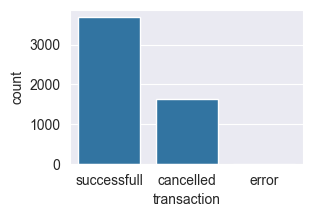

In [45]:
plt.figure(figsize=(3, 2))
sns.barplot(data=transaction_status, x='transaction', y='count')
plt.show()

### 3. Сколько транзакций завершились ошибкой?

In [57]:
transaction_status.query('transaction == "error"')['count'].iloc[0]

4

### 4. Сколько успешных транзакций осуществил каждый из пользователей?
Постройте гистограмму распределения числа успешных транзакций.

In [63]:
successful_by_user = transaction\
                                .query('transaction == "successfull"')\
                                .groupby('name',as_index=False)\
                                .agg({'transaction': 'count'})\
                                .rename(columns={'transaction': 'n_successful'})\
                                .sort_values(by='n_successful', ascending=False)
successful_by_user

,name,n_successful
48,Svetlana_Smirnova,82
41,Olga_Smirnova,80
31,Masha_Ozerova,80
43,Svetlana_Ivanova,79
47,Svetlana_Polyanova,78
33,Masha_Polyanova,78
6,Ekaterina_Smirnova,77
22,Lolita_Ivanova,76
9,Irina_Lesnova,76
10,Irina_Ozerova,76


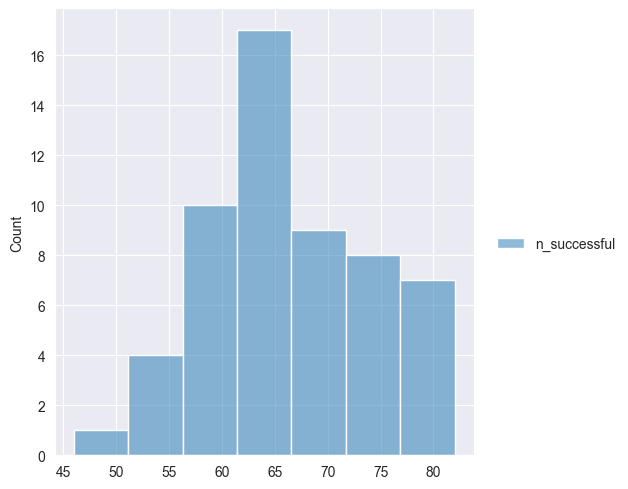

In [71]:
sns.displot(data=successful_by_user)

### 5. Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)
Постройте сводную таблицу user_vs_minute_pivot,

        где в качестве столбцов будут использованы имена пользователей,
        строк – минуты,
        значений – число совершенных операций в указанную минуту.
        Пропущенные значения заполните нулями.


In [102]:
new_transaction = pd.read_csv('data/transaction_data_updated.csv', parse_dates=['date'])
new_transaction

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [80]:
user_vs_minute = new_transaction\
                                        .groupby(['name', 'minute'], as_index=False)\
                                        .agg({'transaction': 'count'})\
                                        .rename(columns={'transaction': 'num_transaction'})
user_vs_minute

,name,minute,num_transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3
...,...,...,...
2573,Vasilisa_Smirnova,52,1
2574,Vasilisa_Smirnova,53,1
2575,Vasilisa_Smirnova,54,2
2576,Vasilisa_Smirnova,56,3


In [89]:
user_vs_minute_pivot = user_vs_minute.pivot(columns='name', index='minute', values='num_transaction')
user_vs_minute_pivot.fillna(0, inplace=True)
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,3.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,3.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0


Альтернативный вариант построения таблицы.

In [93]:
user_vs_minute_pivot2 = new_transaction.pivot_table(
                                                    columns='name',
                                                    index='minute',
                                                    values='transaction',
                                                    aggfunc='count',
                                                    fill_value=0
                                                    )
user_vs_minute_pivot2

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3,4,2,3,4,4,2,1,2,2,...,0,3,1,1,4,1,3,0,0,1
1,4,4,0,4,2,5,4,4,4,3,...,4,5,3,2,3,3,0,0,3,2
2,1,2,4,4,2,1,3,2,3,3,...,4,1,3,3,0,1,2,1,3,1
3,3,0,2,0,5,2,1,3,2,2,...,1,5,5,2,4,0,3,4,1,0
4,3,0,0,3,1,1,2,3,2,1,...,1,2,2,1,1,2,2,3,0,1
5,3,0,2,3,1,0,5,3,1,3,...,0,2,3,1,0,0,3,0,2,1
6,4,1,2,2,0,4,5,2,2,2,...,2,1,4,1,2,4,1,2,0,2
7,3,2,1,2,2,3,4,1,1,3,...,3,1,1,2,4,1,0,1,2,2
8,2,4,3,1,0,3,2,1,1,0,...,0,1,0,1,2,4,2,1,1,1


In [96]:
(user_vs_minute_pivot == user_vs_minute_pivot2).all().all()

True


### 6.  Постройте график общего числа транзакций в каждую минуту.

<Axes: xlabel='minute'>

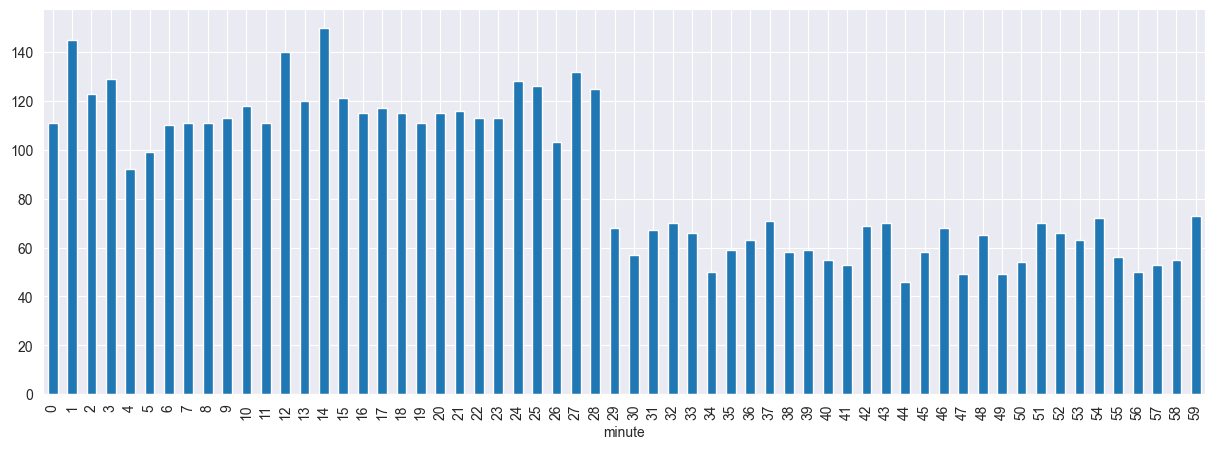

In [101]:
user_vs_minute_pivot.sum(axis=1).plot.bar(figsize=(15,5))

Виден перекос графика в левой части - надо проверить с чем это связано.

In [104]:
new_transaction

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [106]:
new_transaction.date.min()

Timestamp('2020-03-02 00:00:00')

In [107]:
new_transaction.date.max()

Timestamp('2020-03-02 01:29:05')

Данные собраны за полтора часа, а в колонке minute содержаться данные только по минутам (отбрасывая часы), то есть час не переведен в минуты.

In [121]:
new_transaction['true_minute'] = new_transaction.date.dt.minute + new_transaction.date.dt.hour*60
new_transaction

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


<Axes: xlabel='true_minute', ylabel='count'>

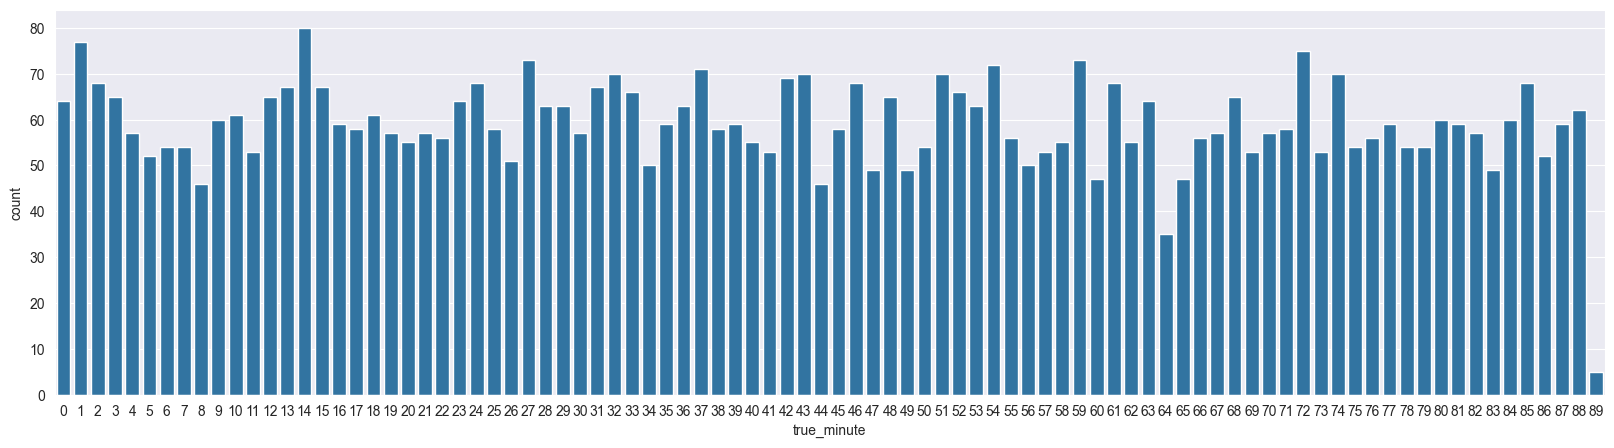

In [122]:
plt.figure(figsize=(20,5))
sns.countplot(new_transaction, x='true_minute')

## Построен верный график распределения количества транзакций по минутам.